<a href="https://colab.research.google.com/github/tettey-exploits/human_gait_recognition_with_cnns/blob/main/Gait_Recognition_with_Convolutional_Neural_Networks_IndabaX_Computer_Vision_Tutorial_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gait Recognition with Convolutional Neural Networks**
**Content Creator(s):** Joshua Tettey Teye, Nana Akua Osafo

## **Content**

1.  [Introduction and Setup](#part1)
2.  [Dataset Preparation](#part2)
      1. [Prepare GEI Images](#part2.1)
        - [Compute the Gait Energy Image (GEI) from a sequence of images.](#part2.1.1)
      2.  [Visualize](#part2.2)
      3.  [Load Pre-saved Dataset](#part2.3)
        - [Dataset Processing:](#part2.3.1)
      4.  [Dataset Visualization](#part2.4)
3.   [Model Building](#part3)
      1.  [Convolutional Neural Network (Conv1D) Model Overview](#part3.1)
      2.  [Convolutional Neural Network (Conv2D) Model Overview](#part3.2)
4.   [Model Training](#part4)
5.   [Model Evaluation](#part5)
      1.   [Training Curve Visualization](#part5.1)
6.   [Conclusion](#part6)




<a name="part1"></a>

<a id="introduction"></a>

## Introduction and Setup
### **What is Gait Recognition?**

Gait recognition is a biometric technology that identifies individuals based on their walking patterns. It involves analyzing the unique way a person walks, which can be captured and processed using video sequences or specialized sensors to create a Gait Energy Image (GEI). These GEIs are then used to train machine learning models, particularly Convolutional Neural Networks (CNNs), to recognize and differentiate individuals based on their gait.

### **Why is Gait Recognition Important?**

1. **Security and Surveillance**: Gait recognition can be used in security systems for surveillance and monitoring. It provides a non-intrusive way to identify individuals from a distance, even when other biometric identifiers like facial features are obscured.

2. **Healthcare**: In the medical field, gait analysis can help diagnose and monitor conditions related to movement disorders. It can be used in rehabilitation to assess the progress of patients recovering from injuries or surgeries.

3. **Access Control**: Gait recognition can be implemented in access control systems to allow or restrict entry based on the walking patterns of individuals, adding an additional layer of security.

4. **Human-Computer Interaction**: Understanding gait can enhance the development of more intuitive human-computer interaction systems, enabling applications such as gesture-based controls and user identification in virtual environments.

5. **Forensics**: Gait recognition can be used in forensic investigations to identify suspects or victims from surveillance footage, providing critical evidence in legal cases.


### **Objective of the Tutorial Session**

The objective of this tutorial session is to provide a comprehensive, step-by-step guide on developing a Convolutional Neural Network (CNN) for gait recognition using Gait Energy Images (GEIs). By the end of this tutorial, participants will have gained hands-on experience in the following areas:

1. **Data Preparation**: Acquire skills to download, extract, and preprocess the GEI dataset, ensuring the data is ready for training the CNN model.

2. **Model Building**: Gain insights into designing a CNN architecture specifically for gait recognition, including the selection of layers and parameters.

3. **Training the Model**: Understand the process of training the CNN model using the prepared dataset, including setting training parameters and monitoring the model's performance.

4. **Evaluating the Model**: Learn how to evaluate the trained model's performance using test data, employing metrics and techniques to assess its accuracy and effectiveness.

The tutorial aims to equip participants with the knowledge and practical skills needed to build and evaluate a CNN for gait recognition, fostering a deeper understanding of computer vision and machine learning techniques.

<a name="part2"></a>


<a id="data-preparation"></a>
## Dataset Preparation

### **What are Gait Energy Images (GEIs)?**

Gait Energy Images (GEIs) are a type of biometric representation used in gait recognition systems. GEIs are created by averaging the silhouettes of a person walking over a complete gait cycle. This process captures the essential features of a person's walking pattern in a single image.

#### **Key Characteristics of GEIs**:

1. **Temporal Averaging**: GEIs are generated by averaging the binary silhouette images of a walking sequence. This helps in capturing the dynamic motion of walking while reducing the impact of noise and variations in individual frames.

2. **Spatial Representation**: The resulting image is a 2D representation that encapsulates the spatial characteristics of the gait cycle. It highlights the regions of the body that move the most and the least, providing a unique pattern for each individual.

GEIs serve as a powerful tool for gait recognition, enabling the identification of individuals based on their unique walking patterns. They bridge the gap between raw video data and the features needed for accurate and reliable gait analysis.

In this section, we will prepare the Gait Energy Image (GEI) dataset by downloading and unzipping the required files.


In [ ]:
# Import required libraries
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import time
from skimage.io import imread
import os
from imageio import imread
from skimage.transform import resize
import glob

In [ ]:
# Download and unzip the dataset
!gdown 1AtxupiBJdJjL-B8YrjyQy9-U_Xl4V4HD  # download folder '001'

# unzip downloaded file
zip_ref = zipfile.ZipFile("/content/001-silhoutte.zip")
zip_ref.extractall()
zip_ref.close()
print("File unzipped")

In [ ]:
dataset_path = "/content/001/" # define path to extracted dataset

In [ ]:
def inspect_dataset_dir():
    """
    This function inspects the dataset directory structure and prints out the number of directories and images
    present in each sub-directory.

    It walks through the directory specified by 'dataset_path', which should be the root path of the dataset.
    For each directory it encounters, it prints the number of sub-directories and image files contained within it.
    """
    # Walk through the directory structure starting from 'dataset_path'
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        # Print the number of directories and images in the current path
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
inspect_dataset_dir()

There are 10 directories and 0 images in /content/001/
There are 11 directories and 0 images in /content/001/nm-06
There are 0 directories and 63 images in /content/001/nm-06/072
There are 0 directories and 107 images in /content/001/nm-06/036
There are 0 directories and 89 images in /content/001/nm-06/054
There are 0 directories and 100 images in /content/001/nm-06/000
There are 0 directories and 68 images in /content/001/nm-06/180
There are 0 directories and 69 images in /content/001/nm-06/144
There are 0 directories and 106 images in /content/001/nm-06/018
There are 0 directories and 68 images in /content/001/nm-06/162
There are 0 directories and 67 images in /content/001/nm-06/126
There are 0 directories and 59 images in /content/001/nm-06/090
There are 0 directories and 61 images in /content/001/nm-06/108
There are 11 directories and 0 images in /content/001/bg-01
There are 0 directories and 60 images in /content/001/bg-01/072
There are 0 directories and 87 images in /content/001/

<a name="part2.1"></a>

<a id="prepare-gei"></a>

### Prepare GEI Images

To compute Gait Energy Images (GEI), you typically follow these steps:

1. **Image Preprocessing**:
   - **Read and Load Images**: Load a sequence of images representing a gait cycle.
   - **Preprocess Images**: Normalize, resize, and/or preprocess images to ensure consistency in size and format.

2. **Extract Region of Interest (ROI)**:
   - Determine the region of interest (ROI) in each image that contains the moving subject (e.g., person walking).
   - Use techniques like thresholding or edge detection to isolate the subject from the background.

3. **Compute Binary Silhouettes**:
   - Convert each image to a binary silhouette representation where the subject is white (foreground) and the background is black.

4. **Calculate Mass Center (Centroid)**:
   - Compute the centroid of each binary silhouette to find the average position of the subject across all frames.

5. **Align Images**:
   - Center each binary silhouette based on its centroid to ensure consistent positioning.

6. **Compute GEI**:
   - Calculate the average intensity of aligned binary silhouettes across all frames.
   - This averaged image represents the Gait Energy Image (GEI), which captures the energy distribution of the gait cycle.



- **mass_center(img, is_round=True)**: This function computes the centroid (mass center) of the given input image. It calculates the average row (Y) and column (X) positions weighted by pixel intensities. The optional `is_round` parameter determines whether to round the centroid coordinates. It returns the coordinates (X, Y) of the mass center.

- **image_extract(img, newsize)**: This function extracts a region of interest (ROI) from the input image based on non-zero pixel intensities along rows and columns. It computes the ROI's boundaries, centers it using the mass center computed by `mass_center`, and ensures the extracted region fits within the image boundaries. The ROI is then resized to the specified `newsize` (width, height) using bilinear interpolation and returns the resized ROI as a numpy array.

- **compute_gei(images)**: This function computes the Gait Energy Image (GEI) from a list or array of input images. It iterates over each image, extracts and resizes a consistent ROI using `image_extract`, and then computes the mean image (GEI) across all processed frames. The resulting GEI image encapsulates the average intensity distribution of the gait cycle across the input images and returns it as a numpy array.

In [ ]:
def mass_center(img, is_round=True):
    """
    Computes the mass center (centroid) of the given image.

    Parameters:
    - img: Input image as a numpy array.
    - is_round: Flag to round the centroid coordinates. Default is True.

    Returns:
    - Tuple (X, Y) coordinates of the mass center.
    """
    Y = img.mean(axis=1)
    X = img.mean(axis=0)
    Y_ = np.sum(np.arange(Y.shape[0]) * Y) / np.sum(Y)
    X_ = np.sum(np.arange(X.shape[0]) * X) / np.sum(X)

    if is_round:
        return int(round(X_)), int(round(Y_))
    return X_, Y_

def image_extract(img, newsize):
    """
    Extracts a region of interest (ROI) from the image and resizes it to the specified size.

    Parameters:
    - img: Input image as a numpy array.
    - newsize: Tuple (width, height) specifying the desired size of the output image.

    Returns:
    - Resized image as a numpy array.
    """
    x_s = np.where(img.mean(axis=0) != 0)[0].min()
    x_e = np.where(img.mean(axis=0) != 0)[0].max()
    y_s = np.where(img.mean(axis=1) != 0)[0].min()
    y_e = np.where(img.mean(axis=1) != 0)[0].max()

    x_c, _ = mass_center(img)
    x_s = x_c - newsize[1] // 2
    x_e = x_c + newsize[1] // 2

    # Ensure the extracted region is within image boundaries
    img_roi = img[y_s:y_e, max(x_s, 0):min(x_e, img.shape[1])]

    # Resize the ROI to the specified size
    resized_img = resize(img_roi, newsize)
    return resized_img

def compute_gei(images):
    """
    Computes the Gait Energy Image (GEI) from a list of input images.

    Parameters:
    - images: List or array of input images as numpy arrays.

    Returns:
    - GEI image as a numpy array.
    """
    # Extract and resize images to a consistent size
    images_resized = np.array([image_extract(i, (128, 64)) for i in images], dtype="object")

    # Compute the mean image (GEI) across all frames
    gei = np.mean(np.array(images_resized, dtype="object"), axis=0)
    return gei

<a name="part2.1.1"></a>


<a id="compute-gei"></a>

#### Compute the Gait Energy Image (GEI) from a sequence of images.

`show(image, label=None)`: This function displays a single image using matplotlib with an optional label. It ensures the image is shown in grayscale (cmap="gray"), making it suitable for visualizing processed images during the analysis.

`find_gei(path=None)`: This function computes Gait Energy Images (GEI) from a directory of image sequences specified by path. It iterates through all subdirectories using os.walk, loads images from each directory, computes the GEI using the compute_gei function, and displays the resulting GEI images using matplotlib. If path is not provided, it assumes dataset_path is defined elsewhere in the environment.

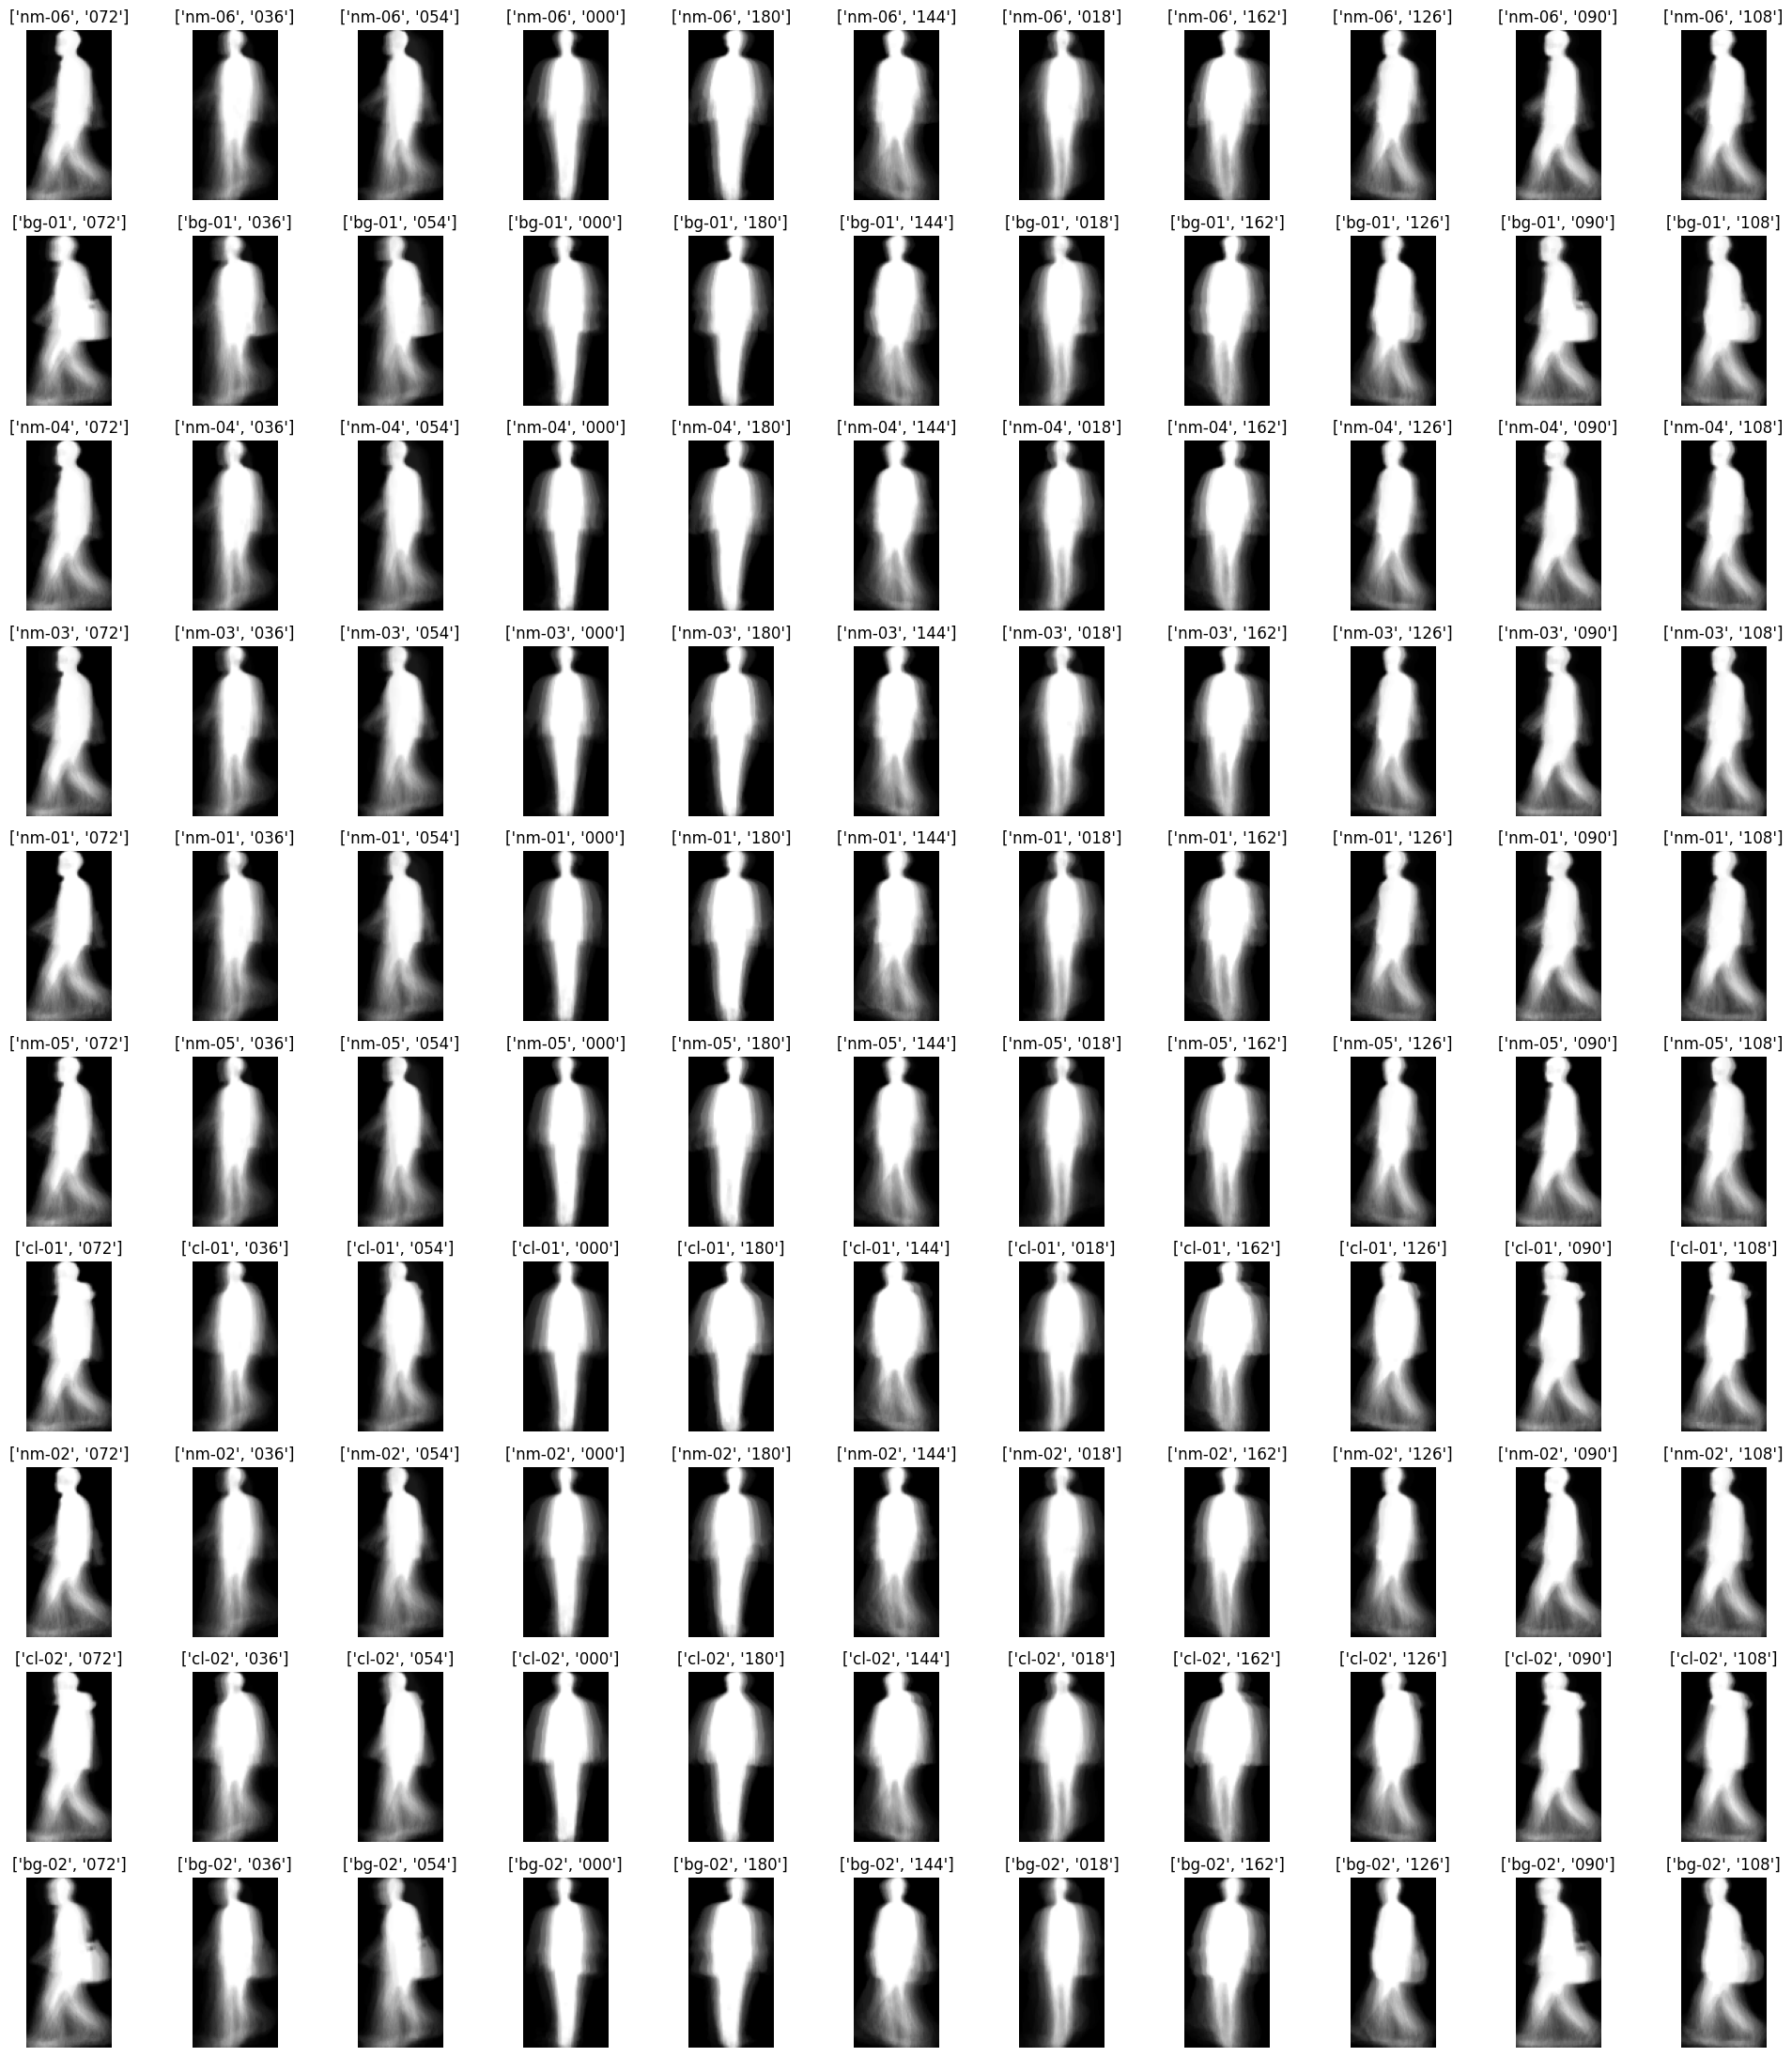

Time taken: 27.597758769989014 seconds


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import time

# Preprocess the data
X = []
Y = []

def show(image, label=None):
    """
    Display an image with an optional label.

    Parameters:
    - image: Input image as a numpy array.
    - label: Optional label for the image.

    Returns:
    - None
    """
    plt.figure()
    plt.imshow(image.astype("float32"), cmap="gray")
    if label is not None:
        plt.title(label)
    plt.axis('off')

def find_gei(path=None):
    """
    Computes the Gait Energy Image (GEI) from a sequence of images in the specified path.

    Parameters:
    - path: Path to the directory containing the image sequences. If None, uses dataset_path.

    Returns:
    - None
    """
    if path is None:
        path = dataset_path  # Assuming dataset_path is defined elsewhere

    figure, axis = plt.subplots(10, 11, figsize=(20, 22))

    i = 0
    for dirpath, dirnames, filenames in os.walk(path):
        current_path = dirpath.split("/")[-1]

        num_files = len(filenames)
        if len(dirnames) == 0 and num_files > 0:  # If end of directory tree and files exist
            images = np.array([imread(f"{dirpath}/{filename}") for filename in filenames])
            try:
                gei = compute_gei(images)
                if gei.shape == (128, 64):
                    X.append(gei.astype("float32"))
                    Y.append(int(dirpath.split("/")[-3]))
                else:
                    print(gei.shape)
                    print("One image skipped")
            except ValueError:
                pass  # Skip if compute_gei raises a ValueError

            axis.flatten()[i].imshow(gei.astype("float32"), cmap="gray")
            axis.flatten()[i].set_title(dirpath.split('/')[-2:])
            axis.flatten()[i].set_axis_off()
            i += 1

            # Optionally show individual GEI images
            # show(gei, dirpath.split("/")[-3:])

    plt.tight_layout()
    plt.show()

# Example usage
start_time = time.time()
find_gei()
print("Time taken:", time.time() - start_time, "seconds")

<a name="part2.2"></a>


<a id="visualize-preprocess"></a>

### Visualize

Next, we viusalize. Visualizing selected images in the `visualize_selected_images` function is essential for understanding and validating the dataset used for computing Gait Energy Images (GEI). By randomly selecting and displaying images based on specified modes and angles, this function provides insights into the dataset's diversity, image quality, and content variability. This visual inspection not only ensures the data aligns with expectations but also aids in debugging and communicating results effectively.

Additionally, computing and displaying the GEI image alongside the selected images offers a comparative view, highlighting how the computed representation captures the gait dynamics across multiple frames, thereby enhancing the interpretability and trustworthiness of subsequent analyses.

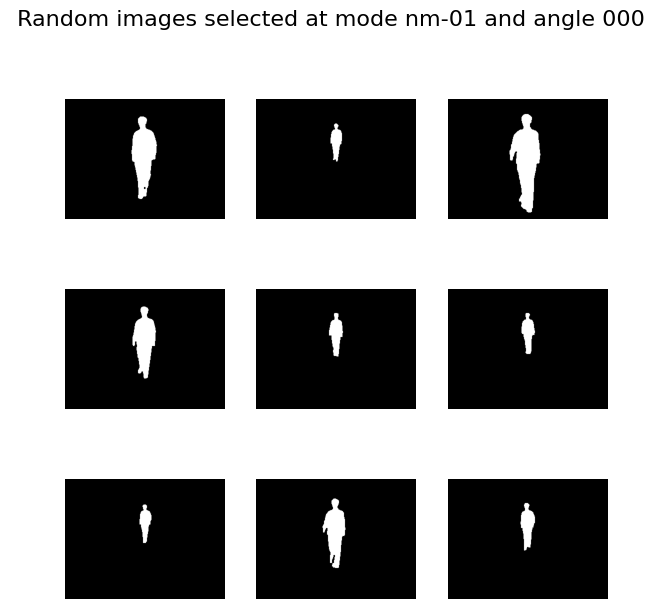

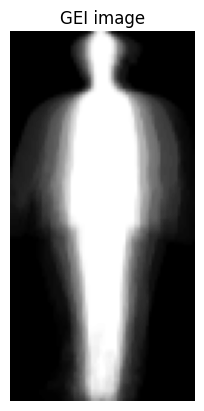

In [ ]:
def visualize_selected_images(mode="nm-01", angle="000"):
    """
    Visualizes a random selection of images from a specified directory path based on mode and angle.

    Parameters:
    - mode: String specifying the mode of images to visualize (default is "nm-01").
    - angle: String specifying the angle of images to visualize (default is "000").

    Returns:
    - None
    """
    filepaths = glob.glob(f"{dataset_path}/{mode}/{angle}/*")  # Get all images present in the directory
    np.random.shuffle(filepaths)  # Shuffle the set to produce different images every time
    images = np.array([imread(filepath) for filepath in filepaths])  # Read images from given filenames

    figure, axis = plt.subplots(3, 3, figsize=(7, 7))
    figure.suptitle(f' Random images selected at mode {mode} and angle {angle}', fontsize=16)

    for i, image in enumerate(images[:9]):  # Loop through images and display a subset of 9
        axis.flatten()[i].imshow(image, cmap="gray")
        axis.flatten()[i].set_axis_off()

    # Compute and display the Gait Energy Image (GEI) for the selected images
    gei = compute_gei(images)
    show(gei, "GEI image")

# Example usage
visualize_selected_images()


<a name="part2.3"></a>


<a id="load-dataset"></a>

### Load Pre-saved Dataset

In earlier sections under `Data Preparation`, we discussed the process of generating Gait Energy Images (GEIs) from sequences of images. Generating GEIs is computationally intensive, and creating them for the entire dataset can be time-consuming.

To expedite our analysis, we have pre-computed GEIs for 10 subjects and saved them. Throughout the remainder of this tutorial, we will utilize these pre-generated GEIs. It's important to note that the process described earlier can be applied to generate a fully preprocessed dataset from the CASIA-B dataset or similar datasets.

In [ ]:
# Download prepared dataset
!gdown 1jvTpFkp8PoougPeshEoeX4-NBwl0fc1I  # Download the prepared dataset

# Unzip downloaded file
zip_ref = zipfile.ZipFile("/content/full_tf.zip")  # Specify the path to the downloaded ZIP file
zip_ref.extractall()  # Extract all contents to the current directory
zip_ref.close()
print("File unzipped")  # Print confirmation message after unzipping


Downloading...
From: https://drive.google.com/uc?id=1jvTpFkp8PoougPeshEoeX4-NBwl0fc1I
To: /content/full_tf.zip
100% 9.70M/9.70M [00:00<00:00, 21.0MB/s]
File unzipped


In [ ]:
tf_dataset_path = "/content/full/"  # Specify the path to the preprocessed dataset
full_dataset = tf.data.Dataset.load(tf_dataset_path)  # load dataset from path
print("Dataset loaded")
print(f"Dataset length is: {full_dataset.cardinality()}")  # check dataset length

Dataset loaded
Dataset length is: 704


<a name="part2.3.1"></a>

<a id="data-preprocessing"></a>

#### Dataset Processing:

**Batch Size Definition:** `batch_size=32 `specifies the number of samples per batch during training and testing. Data in both train_dataset and test_dataset are batched into groups of batch_size for efficient training and evaluation in TensorFlow models.

**3D Image Transformation**: Images in full_dataset are expanded from 2D to 3D tensors, preparing them for input into neural networks. Additionally, labels are adjusted by subtracting 1.

**Train-Test Split**: The dataset is split into training (train_dataset) and testing (test_dataset) sets using an 80-20 split ratio with shuffling enabled.

**Dataset Size Check**: The size of the training dataset is printed with train_dataset.cardinality(). The size of the testing dataset is printed with test_dataset.cardinality().





In [ ]:
batch_size = 32  # Define batch size for training and testing datasets

# Expand 2D image to 3D and adjust labels by subtracting 1
full_dataset = full_dataset.map(lambda x, y: (tf.expand_dims(x, axis=-1), y - 1))

# Split data into train and test sets
train_dataset, test_dataset = tf.keras.utils.split_dataset(dataset=full_dataset,
                                                           left_size=0.8,
                                                           right_size=0.2,
                                                           shuffle=True)

# Print sizes of train and test datasets
print(f"Train dataset length: {train_dataset.cardinality()}")
print(f"Test dataset length: {test_dataset.cardinality()}")

# Batch the data
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


Train dataset length: 563
Test dataset length: 141


<a name="part2.4"></a>


<a id="visualize-datset"></a>

### Dataset Visualization
##### Display randomly selected Images

`visualize_randomly_selected_images(split):` This function visualizes randomly selected images from either the training or testing dataset based on the specified split parameter. Has a parameter
`split` which specifies which dataset split to visualize (`train` or `test`). Default is `train`.

The function shuffles the dataset (`train_dataset` or `test_dataset`) and selects a subset of 9 images (`ds`) for visualization. The selected image is displayed in a 3x3 grid using matplotlib (`plt.subplots`), ensuring grayscale representation (`cmap="gray"`). Each subplot is labeled with the corresponding person's label extracted from `label`, providing context for the displayed images.

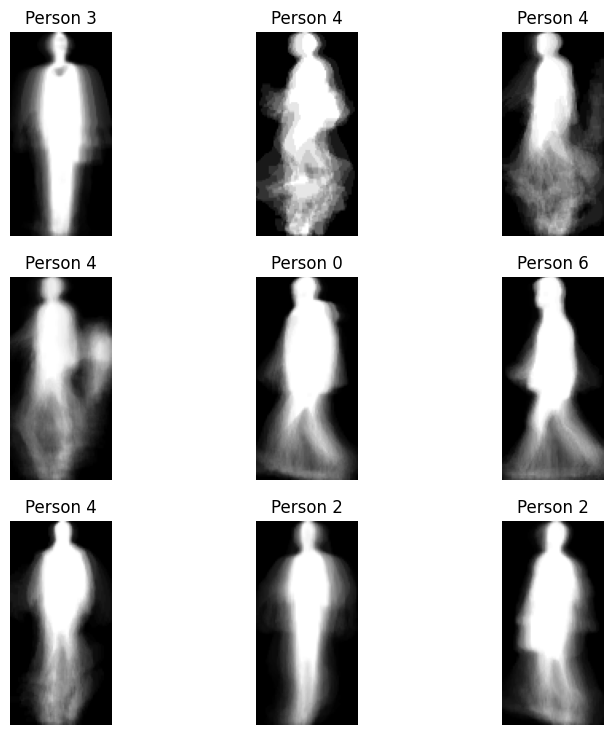

In [ ]:
def visualize_randomly_selected_images(split="train"):
    """
    Visualizes randomly selected images from either the training or testing dataset.

    Parameters:
    - split: String specifying the dataset split to visualize ("train" or "test"). Default is "train".

    Returns:
    - None
    """
    global train_dataset, test_dataset

    if split == "train":
        data = train_dataset.shuffle(train_dataset.cardinality())
    else:
        data = test_dataset.shuffle(test_dataset.cardinality())

    ds = data.take(9)

    figure, axis = plt.subplots(3, 3, figsize=(9, 9))

    for i, (image, label) in enumerate(ds):
        rand_num = np.random.randint(0, image.shape[0])  # Generate a random index within the batch
        axis.flatten()[i].imshow(image[rand_num], cmap="gray")
        axis.flatten()[i].set_title(f"Person {label[rand_num].numpy()}")
        axis.flatten()[i].set_axis_off()

visualize_randomly_selected_images(split="train")

<a name="part3"></a>

<a id="model-building"></a>

## Model Building

<a name="part3.1"></a>


### Convolutional Neural Network (Conv1D) Model Overview

This is a Conv1D neural network model designed for image classification tasks, specifically suited for analyzing Gait Energy Images (GEIs). Here’s a breakdown of its components:

- **Model Architecture**:
  - **Input Layer**: Accepts input tensors of shape (128, 64), corresponding to the dimensions of GEI images.
  - **Convolutional Layers**: Several Conv1D layers with varying filter sizes (16, 32, 64) and kernel sizes (3, 5), each followed by ReLU activation functions. These layers extract features from the input images through convolution operations.
  - **Max Pooling Layers**: Interspersed between convolutional layers to downsample feature maps, enhancing computational efficiency and reducing overfitting.
  - **Flatten Layer**: Converts the 3D feature maps into a 1D vector, preparing them for input into fully connected layers.
  - **Dense Layers**: Fully connected layers that perform classification tasks. The final dense layer uses softmax activation, producing probabilities for each class.

- **Model Compilation**:
  - **Optimizer**: Utilizes the Adam optimizer, known for its efficiency in training deep neural networks.
  - **Loss Function**: Sparse categorical cross-entropy is employed as the loss function, suitable for multi-class classification tasks where each image is associated with a single class label.
  - **Metrics**: Accuracy is monitored during training to evaluate the model’s performance.

- **Summary**:
  - The `conv1d_model.summary()` function call provides a concise overview of the model's architecture, displaying the number of parameters at each layer and the output shape progression.

This Conv1D model configuration is tailored for analyzing GEIs, aiming to effectively classify gait patterns based on image representations. Adjustments to the model architecture or training parameters can be made for experimentation

In [ ]:
# Create a Conv1D neural network model
conv1d_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 64)),  # Input layer with shape (128, 64)
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="relu"),  # Convolutional layer with 16 filters and kernel size 3
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="relu"),  # Convolutional layer with 16 filters and kernel size 3
    tf.keras.layers.MaxPool1D(pool_size=2, strides=2, padding="valid"),  # Max pooling layer with pool size 2x2 and stride 2
    tf.keras.layers.Conv1D(32, 5, activation="relu"),  # Convolutional layer with 32 filters and kernel size 5
    tf.keras.layers.Conv1D(32, 5, activation="relu"),  # Convolutional layer with 32 filters and kernel size 5
    tf.keras.layers.MaxPool1D(2, strides=2),  # Max pooling layer with pool size 2x2 and stride 2
    tf.keras.layers.Conv1D(64, 5, activation="relu"),  # Convolutional layer with 64 filters and kernel size 5
    tf.keras.layers.Conv1D(64, 5, activation="relu"),  # Convolutional layer with 64 filters and kernel size 5
    tf.keras.layers.MaxPool1D(2, strides=2),  # Max pooling layer with pool size 2x2 and stride 2
    tf.keras.layers.Flatten(),  # Flatten layer to convert 3D tensor to 1D
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(8, activation="softmax")  # Output layer with 8 neurons for classification using softmax activation
])

# Compile the model with Adam optimizer, SparseCategoricalCrossentropy loss, and accuracy metric
conv1d_model.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

# Print model summary
conv1d_model.summary()  # Display summary of the model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 16)           784       
                                                                 
 max_pooling1d (MaxPooling1  (None, 62, 16)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 58, 32)            2592      
                                                                 
 conv1d_3 (Conv1D)           (None, 54, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 27, 32)            0         
 g1D)                                                   

In [ ]:
# Let's test the performance of our untrained model
conv1d_model.evaluate(test_dataset)

5/5 [==============================] - 3s 81ms/step - loss: 2.0790 - accuracy: 0.1560


[2.0790300369262695, 0.1560283750295639]

<a name="part3.2"></a>


<a id="model-conv2d"></a>

### Convolutional Neural Network (Conv2D) Model Overview

The provided code defines a Conv2D neural network model suitable for image classification tasks, specifically designed for analyzing 2D image data such as Gait Energy Images (GEIs). Here’s a breakdown of its structure:

- **Model Architecture**:
  - **Input Layer**: Accepts input tensors of shape (128, 64, 1), representing grayscale images with dimensions 128x64 pixels.
  - **Convolutional Layers**: Several Conv2D layers with varying filter sizes (16, 32, 64, 128), kernel sizes (3x3), and ReLU activation functions. These layers apply convolution operations to extract features from input images.
  - **Max Pooling Layers**: Interspersed between convolutional layers to downsample feature maps, enhancing computational efficiency and reducing overfitting.
  - **Flatten Layer**: Converts the 3D feature maps into a 1D vector, preparing them for input into fully connected layers.
  - **Dense Layer**: The final dense layer uses softmax activation, producing probabilities for each class in multi-class classification tasks.

- **Model Compilation**:
  - **Loss Function**: Utilizes sparse categorical cross-entropy, suitable for multi-class classification where each image is associated with a single class label.
  - **Optimizer**: Adam optimizer is employed for efficient gradient-based optimization.
  - **Metrics**: Accuracy is monitored during training to assess the model’s performance.

- **Summary**:
  - The `conv2d_model.summary()` function call provides a detailed overview of the model’s architecture, including the number of parameters at each layer and the output shape progression.

This Conv2D model configuration is tailored for processing and classifying GEIs, offering flexibility for adjusting model architecture or training parameters.

In [ ]:
# Define a Conv2D neural network model
conv2d_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(128, 64, 1)),  # Convolutional layer with 16 filters, kernel size 3x3, and ReLU activation
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),  # Max pooling layer with pool size 2x2 and valid padding
    tf.keras.layers.Conv2D(32, 3, activation="relu"),  # Convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
    tf.keras.layers.MaxPool2D(2),  # Max pooling layer with pool size 2x2
    tf.keras.layers.Conv2D(64, 3, activation="relu"),  # Convolutional layer with 64 filters, kernel size 3x3, and ReLU activation
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),  # Max pooling layer with pool size 2x2 and valid padding
    tf.keras.layers.Conv2D(128, 3, activation="relu"),  # Convolutional layer with 128 filters, kernel size 3x3, and ReLU activation
    tf.keras.layers.MaxPool2D(2),  # Max pooling layer with pool size 2x2
    tf.keras.layers.Flatten(),  # Flatten layer to convert 3D tensor to 1D
    tf.keras.layers.Dense(8, activation="softmax")  # Output layer with 8 neurons for classification using softmax activation
])

# Compile the model with sparse categorical cross-entropy loss, Adam optimizer, and accuracy metric
conv2d_model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# Print model summary to display architecture and parameters
conv2d_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 62, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 6, 64)        

<a name="part4"></a>

<a id="model-training"></a>

## Model Training

- **Training Command**: The `conv2d_model.fit()` function trains the Conv2D model using the specified parameters and dataset.

- **Parameters**:
  - `train_dataset`: Training dataset containing input images and their corresponding labels.
  - `epochs=15`: Specifies the number of training epochs, indicating how many times the model will iterate over the entire dataset during training.

This command initiates the training process of the Conv2D model, optimizing its parameters based on the provided training data while validating its performance against the test dataset.

In [ ]:
# Fit the Conv1D model using training data and validate on test data
conv1d_model_history = conv1d_model.fit(train_dataset,
                                        validation_data=test_dataset,
                                        epochs=15)

Epoch 1/15
18/18 [==============================] - 4s 33ms/step - loss: 1.9951 - accuracy: 0.1901 - val_loss: 1.9267 - val_accuracy: 0.3050
Epoch 2/15
18/18 [==============================] - 0s 6ms/step - loss: 1.7798 - accuracy: 0.3233 - val_loss: 1.6046 - val_accuracy: 0.3404
Epoch 3/15
18/18 [==============================] - 0s 7ms/step - loss: 1.4355 - accuracy: 0.4991 - val_loss: 1.3270 - val_accuracy: 0.5532
Epoch 4/15
18/18 [==============================] - 0s 7ms/step - loss: 1.1918 - accuracy: 0.5790 - val_loss: 0.9511 - val_accuracy: 0.7234
Epoch 5/15
18/18 [==============================] - 0s 7ms/step - loss: 0.9377 - accuracy: 0.6803 - val_loss: 0.7973 - val_accuracy: 0.7376
Epoch 6/15
18/18 [==============================] - 0s 8ms/step - loss: 0.7992 - accuracy: 0.7211 - val_loss: 0.7247 - val_accuracy: 0.7518
Epoch 7/15
18/18 [==============================] - 0s 10ms/step - loss: 0.6686 - accuracy: 0.7709 - val_loss: 0.6397 - val_accuracy: 0.7730
Epoch 8/15
18/18 [

In [ ]:
# Fit the Conv2D model using training data and validate on test data
conv2d_model_history = conv2d_model.fit(train_dataset,
                                        epochs=15,
                                        validation_data=test_dataset)

Epoch 1/15
18/18 [==============================] - 6s 61ms/step - loss: 2.0214 - accuracy: 0.1456 - val_loss: 1.9688 - val_accuracy: 0.1844
Epoch 2/15
18/18 [==============================] - 0s 12ms/step - loss: 1.9804 - accuracy: 0.1918 - val_loss: 1.9264 - val_accuracy: 0.1773
Epoch 3/15
18/18 [==============================] - 0s 10ms/step - loss: 1.9040 - accuracy: 0.2362 - val_loss: 1.8075 - val_accuracy: 0.4255
Epoch 4/15
18/18 [==============================] - 0s 13ms/step - loss: 1.6714 - accuracy: 0.4440 - val_loss: 1.3935 - val_accuracy: 0.4894
Epoch 5/15
18/18 [==============================] - 0s 12ms/step - loss: 1.1489 - accuracy: 0.6057 - val_loss: 0.8722 - val_accuracy: 0.7447
Epoch 6/15
18/18 [==============================] - 0s 12ms/step - loss: 0.7934 - accuracy: 0.7389 - val_loss: 0.6425 - val_accuracy: 0.7589
Epoch 7/15
18/18 [==============================] - 0s 14ms/step - loss: 0.5996 - accuracy: 0.8028 - val_loss: 0.5167 - val_accuracy: 0.8156
Epoch 8/15
18

<a name="part5"></a>


<a id="model-evaluation"></a>

## Model Evaluation

Model evaluation is a crucial step in the machine learning workflow, where we assess the performance of our trained models on unseen data. This step ensures that our model generalizes well and can make accurate predictions on new, real-world data.

In our project, we have trained two convolutional neural network models on the Gait Energy Image (GEI) dataset. To evaluate these models, we used the following approach:

1. **Splitting the Dataset**:
    - We divided our dataset into training and test sets to ensure that our evaluation metrics are based on data that the model has not seen during training.
    - The train set is used to train the model, while the test set is used to evaluate its performance.

2. **Training History**:
    - We tracked the training process of each model, storing metrics such as loss and accuracy over each epoch.
    - Plotting the training history helps visualize how the model learns over time and can highlight issues like overfitting or underfitting.

3. **Metrics**:
    - **Accuracy**: Measures the proportion of correctly predicted instances among the total instances. It is a straightforward metric, especially useful for balanced datasets.
    - **Loss**: Indicates how well or poorly a model is performing. During training, we aim to minimize the loss function, which represents the difference between the predicted and actual values.

4. **Confusion Matrix**:
    - We can visualize the performance of our model using a confusion matrix, which shows the number of correct and incorrect predictions for each class. This helps identify which classes the model struggles with.

### Implementation in Our Notebook

After training our Conv2D model, we will evaluat their performance using the following steps:

1. **Plotting Training Curves**:
    - We will plot the loss and accuracy over the training epochs for both models. This helps visualize the learning process and identify any potential overfitting.

2. **Evaluating on Test Set**:
    - We used the test dataset to compute the final accuracy and loss of our models. This gives us an estimate of how well our models will perform on new, unseen data.

3. **Visualizing Misclassifications**:
    - By examining instances where the model made incorrect predictions, we gain insights into areas where the model might be improved.

4. **Comparison**:
    - Comparing the performance of the Conv1D and Conv2D models helps us understand the strengths and weaknesses of each approach and decide which model to deploy.

By thoroughly evaluating our models, we ensure that they are reliable and robust, capable of making accurate predictions when applied to real-world data.

After training our Conv1D and Conv2D models, the next crucial step is to evaluate its performance on the test dataset. This step is essential to understand how well our model generalizes to unseen data.

The `(model_name).evaluate(test_dataset)` function is used for this purpose.




In [ ]:
# Evaluate the performance of the conv1d model
conv1d_model.evaluate(test_dataset)

5/5 [==============================] - 0s 4ms/step - loss: 0.3402 - accuracy: 0.8652


[0.3401631712913513, 0.8652482032775879]

In [ ]:
# Evaluate the performance of the conv1d model
conv2d_model.evaluate(test_dataset)

5/5 [==============================] - 0s 4ms/step - loss: 0.2240 - accuracy: 0.9291


[0.2240007221698761, 0.9290780425071716]

<a name="part5.1"></a>


<a id="training-curve"></a>

### Training Curve Visualization


Next, we want to  visualize the training curves for both Conv1D and Conv2D models using matplotlib and pandas. These visualizations are crucial for monitoring and evaluating the training progress of each model, providing insights into their convergence, overfitting, and overall performance improvement across epochs. Adjustments to model architecture or training strategies can be guided by these visual representations.
  

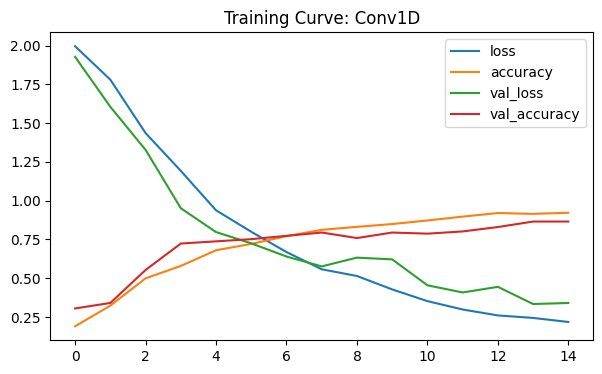

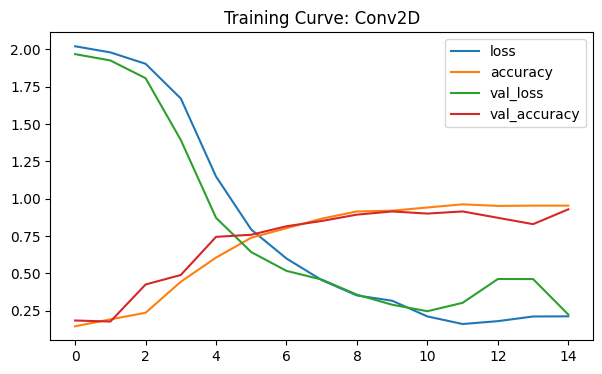

In [ ]:
import pandas as pd

# Plot training curve for Conv1D model
pd.DataFrame(conv1d_model_history.history).plot(figsize=(7, 4))  # Create a DataFrame from Conv1D training history and plot it
plt.title("Training Curve: Conv1D")  # Set title for the plot
plt.savefig("training_curve_conv1d.png")  # Save the plot as a PNG file

# Plot training curve for Conv2D model
pd.DataFrame(conv2d_model_history.history).plot(figsize=(7, 4))  # Create a DataFrame from Conv2D training history and plot it
plt.title("Training Curve: Conv2D")  # Set title for the plot
plt.savefig("training_curve_conv2d.png")  # Save the plot as a PNG file

<a name="part6"></a>


<a id="conclusion"></a>

# Conclusion

Throughout this tutorial notebook, we've explored the application of Convolutional Neural Networks (CNNs) in analyzing Gait Energy Images (GEIs). Here are the key takeaways from our exploration:

1. **Data Preparation and Preprocessing**:
   - We implemented methods to compute GEIs from sequences of images and visualized random samples to understand dataset characteristics.

2. **Model Development**:
   - Developed two types of CNN models: Conv1D and Conv2D, tailored for processing 1D and 2D image data, respectively.
   - Configured each model with appropriate layers for feature extraction and classification.

3. **Training and Evaluation**:
   - Trained both models using TensorFlow/Keras, optimizing with suitable loss functions and evaluating performance metrics like accuracy.
   - Monitored training progress with visualizations of training curves to assess model convergence and performance trends.

4. **Model Comparison and Insights**:
   - Compared Conv1D and Conv2D architectures, noting their respective strengths in handling sequential versus spatial image data.
   - Analyzed how model design impacts performance metrics, providing insights into their suitability for GEI classification tasks.

5. **Future Directions**:
   - Consider further model refinement through hyperparameter tuning and regularization techniques.
   - Explore dataset expansion or augmentation to enhance model robustness and generalization.
   - Extend applications to real-world scenarios, potentially integrating models for biometric recognition or surveillance systems.

This tutorial has equipped you with foundational knowledge and practical skills in leveraging CNNs for analyzing GEIs, paving the way for continued exploration and application in computer vision and biometric recognition domains.

---
#Congrats! That's it for this tutorial.

---
<h1> Author(s):</h1>


# **Joshua Tettey Teye**


**Social Media Handles**:
* **LinkedIn:** [Joshua Tettey Teye](www.linkedin.com/in/joshua-tettey-teye-286549252)

* **Email:** joshuatettey049@gmail.com


# **Nana Akua Amoabea Osafo**

**Social Media Handles**:
* **LinkedIn:** [Nana Akua Amoabea Osafo](https://www.linkedin.com/in/akua-amoabea-osafo-5027b8289/)


* **Email:** amoabeaakuaosafo@gmail.com

---

*This notebook was originally created by Ghana Data Science Summit for the [IndabaX Ghana](https://www.indabaxghana.com/) 2024 Conference and is published under [MIT license](https://choosealicense.com/licenses/mit/).*